In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [7]:
main_file = pd.read_csv("./ML/HR_company/HR_comma_sep.csv")
main_file.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


In [9]:
# Columns datatypes and missign values
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_evaluation        14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   satisfaction_level     14999 non-null  float64
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   role                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
# numerical feature overview
main_file.describe()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.716102,3.803054,201.050337,3.498233,0.144610,0.612834,0.238083,0.021268
std,0.171169,1.232592,49.943099,1.460136,0.351719,0.248631,0.425924,0.144281
min,0.360000,2.000000,96.000000,2.000000,0.000000,0.090000,0.000000,0.000000
25%,0.560000,3.000000,156.000000,3.000000,0.000000,0.440000,0.000000,0.000000
50%,0.720000,4.000000,200.000000,3.000000,0.000000,0.640000,0.000000,0.000000
75%,0.870000,5.000000,245.000000,4.000000,0.000000,0.820000,0.000000,0.000000
max,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# checking if there any missing values
main_file.isna().count()


last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
satisfaction_level       14999
left                     14999
promotion_last_5years    14999
role                     14999
salary                   14999
dtype: int64

In [16]:
# left - 1(True) means employess who have left
 
df_left=main_file.groupby('left')

df_left.mean()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,promotion_last_5years
left,,,,,,,
0,0.715473,3.786664,199.060203,3.380032,0.175009,0.666810,0.026251
1,0.718113,3.855503,207.419210,3.876505,0.047326,0.440098,0.005321


In [21]:
left_count=df_left.count()
left_count

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,promotion_last_5years,role,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


### Data Visualization

In [37]:
print(left_count.index.values)
print("\n",left_count['satisfaction_level'])
left

[0 1]

 left
0    11428
1     3571
Name: satisfaction_level, dtype: int64


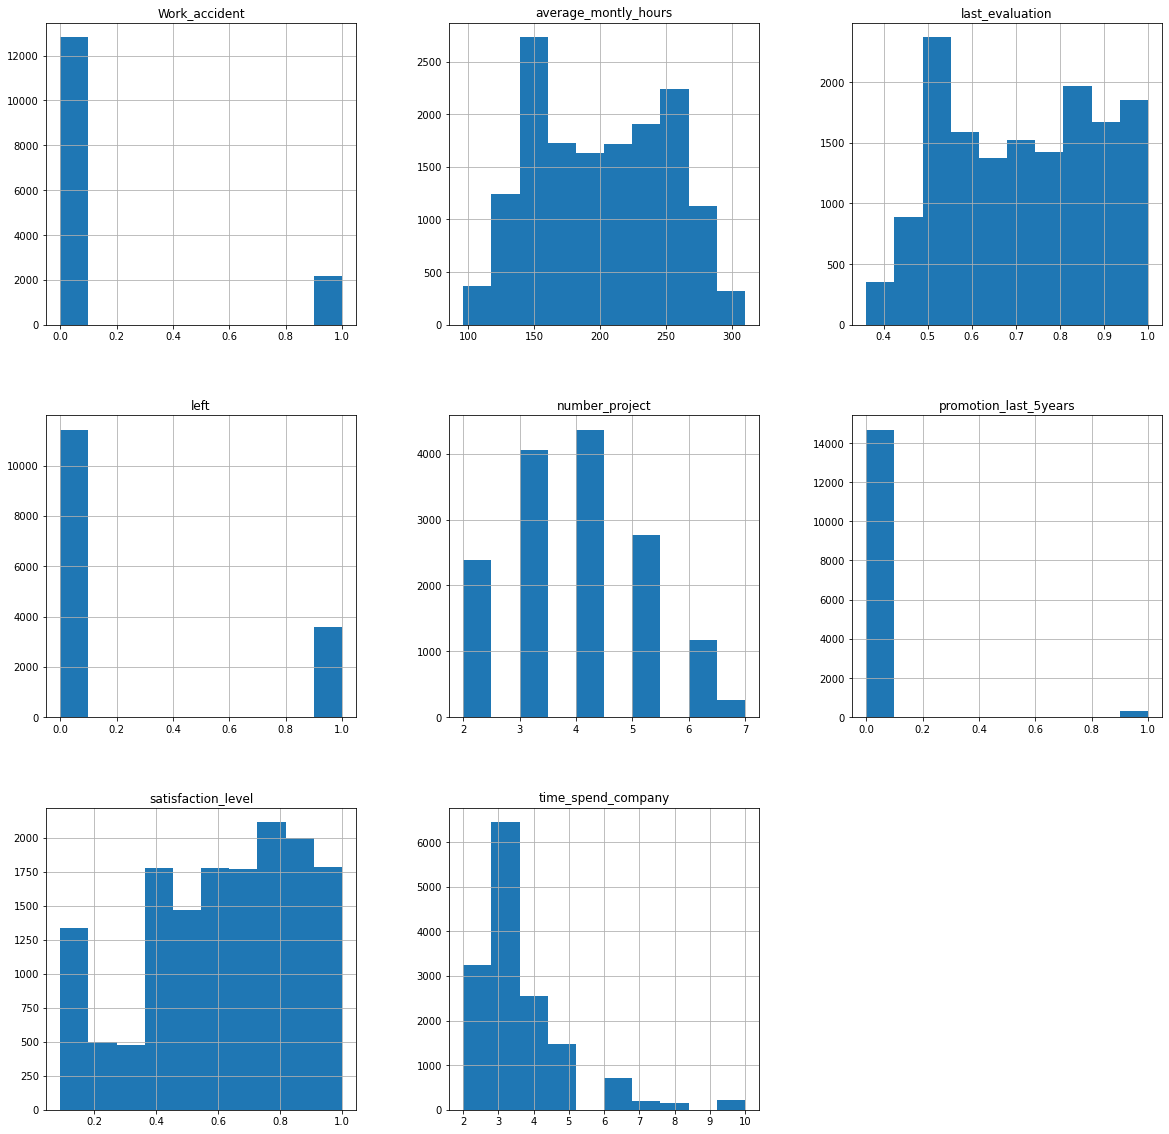

In [83]:

main_file.hist(figsize=(20,20))




plt.grid()
plt.show()

In [58]:
print(list(main_file.columns))

['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'satisfaction_level', 'left', 'promotion_last_5years', 'role', 'salary']


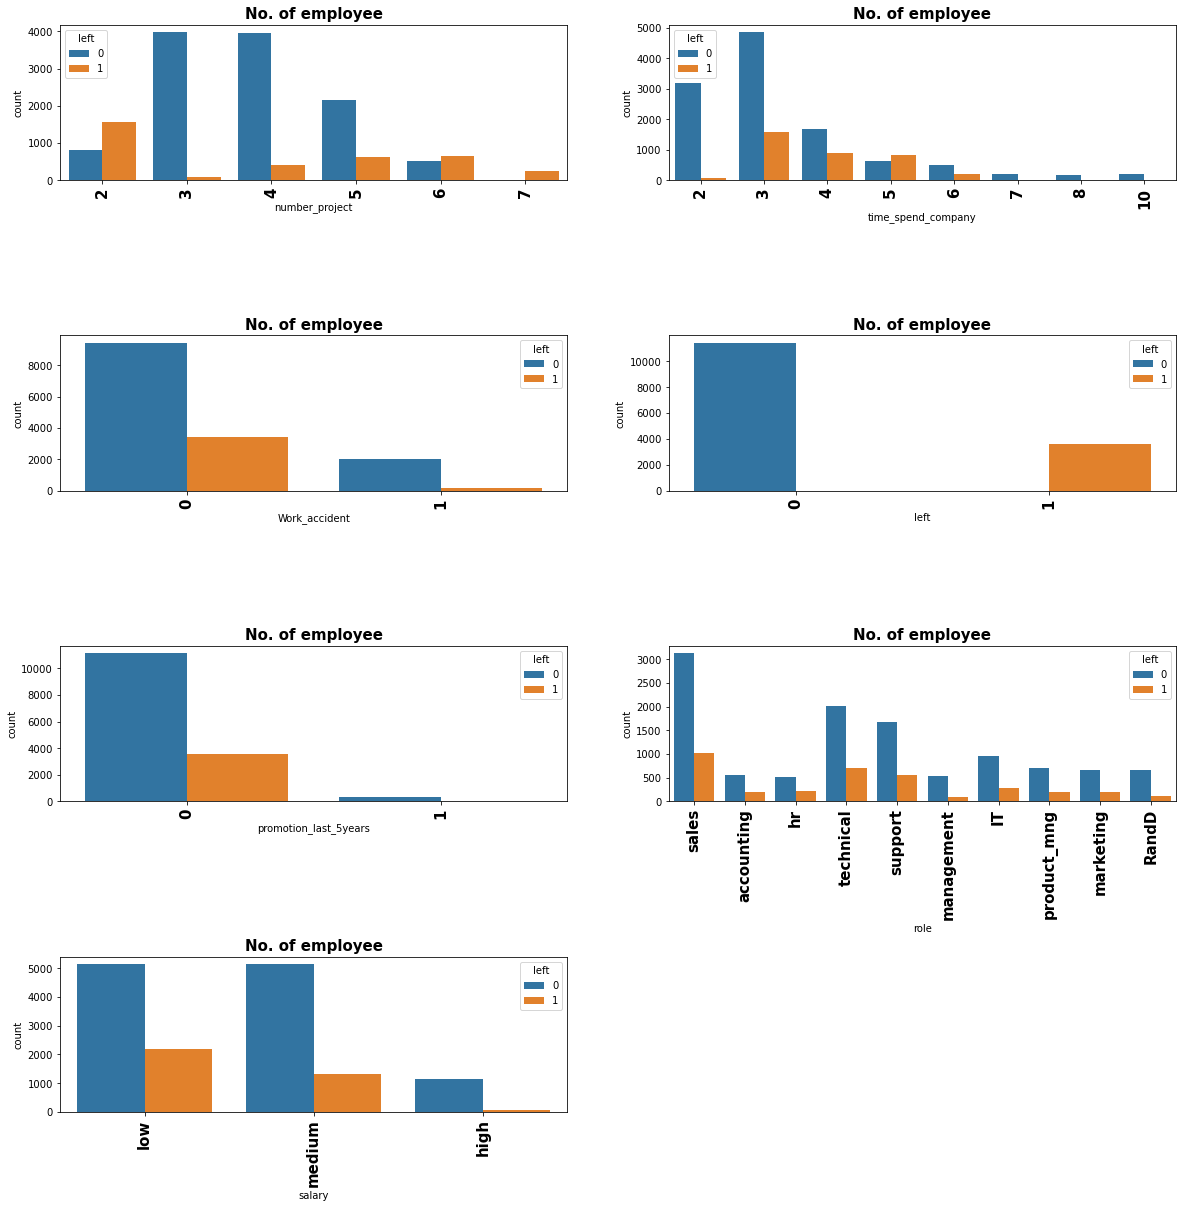

In [81]:
# features=list(main_file.columns)

features= ['number_project','time_spend_company','Work_accident','left','promotion_last_5years','role','salary']


plt.subplots(figsize=(20,20),squeeze=True)

# enumerate() method adds counter to an iterable and returns it
for i,j in enumerate(features):

    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 1.0)
    
    sns.countplot(x=j,data = main_file,hue='right')
    plt.xticks(rotation=90,fontsize=15,fontweight='bold')
    
#     plt.xlabel(fontsize=15,fontweight='bold')
#     plt.ylabel(fontsize=15,fontweight='bold')
    plt.title("No. of employee",fontsize=15,fontweight='bold')




### Cluster Analysis

In [84]:
#import module
from sklearn.cluster import KMeans

# Filter data of left employee 
left_group =  main_file[['satisfaction_level', 'last_evaluation']][main_file.left == 1]

# grouping together  using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_group)

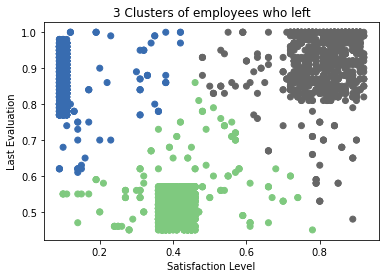

In [87]:
# Add new column "label" and assign cluster labels.
left_group['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_group['satisfaction_level'], left_group['last_evaluation'], c=left_group['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [86]:

# insights from above graph

""" High Satisfaction and High Evaluation-Shaded by grey color in the graph
    Low Satisfaction and High Evaluation- Shaded by blue color
    Moderate Satisfaction and moderate Evaluation- Shaded by green color in the graph)


"""

' High Satisfaction and High Evaluation-Shaded by green color in the graph\n    Low Satisfaction and High Evaluation- Shaded by blue color\n    Moderate Satisfaction and moderate Evaluation- Shaded by grey color in the graph)\n\n\n'

## Bluiding a Prediction Analysis

###### Pre-Processing Data

In [90]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
main_file['salary']=le.fit_transform(main_file['salary'])
main_file['role']=le.fit_transform(main_file['role'])
main_file.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,7,1
1,0.86,5,262,6,0,0.80,1,0,7,2
2,0.88,7,272,4,0,0.11,1,0,7,2
3,0.87,5,223,5,0,0.72,1,0,7,1
4,0.52,2,159,3,0,0.37,1,0,7,1


##### Spliting Data for Training and testing

In [91]:

X = main_file[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
               'Work_accident','promotion_last_5years', 'role', 'salary']]

# target variable
Y = main_file['left']

In [94]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# test sample size 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_test)) 
print(len(Y_train)) 
print(len(Y_test))

10499
4500
10499
4500


##### Model Building

In [102]:
#sklearn modules for ML model selection

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier



from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [103]:

# selection of algorithms to consider and set performance measure
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))

models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))

models.append(('SVM', SVC(gamma='auto', random_state=7)))

models.append(('KNN', KNeighborsClassifier()))

models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))

models.append(('Gaussian NB', GaussianNB()))

models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))



#### Model Performance

In [104]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, Y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, Y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\amit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\amit\appdata\local\programs\python\python38-32\li

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.16,0.35,99.04,0.31
6,GradientBoostingClassifier,98.83,0.38,97.78,0.33
4,Decision Tree Classifier,97.46,0.75,97.92,0.70
2,SVM,96.85,0.57,94.78,0.73
3,KNN,96.77,0.59,93.23,0.56
5,Gaussian NB,85.01,1.65,79.86,1.65
0,Logistic Regression,81.56,1.20,75.03,0.88


In [ ]:
"""
we can use Random Forest model or GradientBoostingClassifier model 

"""